In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


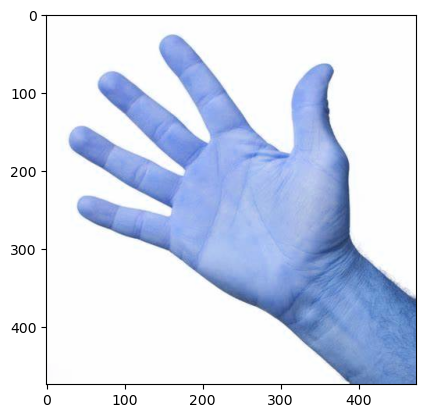

In [40]:
#ploting the orignla image in grayscale

image = cv2.imread("test/test_hand.jpg") 
  
plt.imshow(image,cmap='gray') 


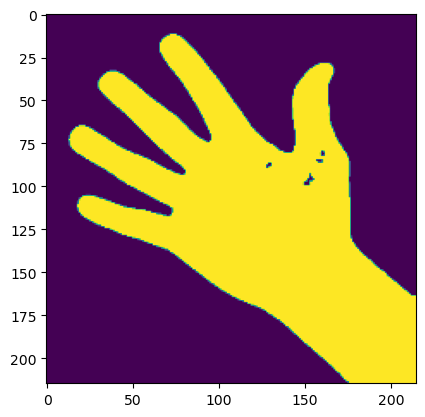

In [45]:
#extracting out the hand shape out of the image using the threshhold features


gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
  
blurred = cv2.GaussianBlur(gray,(7,7),0)

(T,threshInv) = cv2.threshold(blurred,200,255,cv2.THRESH_BINARY_INV)
thresh = cv2.resize(threshInv,(215,215))
plt.imshow(thresh)

In [46]:
#saving a image with only hand features

cv2.imwrite('hand_test.jpg',thresh)

True

In [51]:
#fetching the saved model

from tensorflow.keras.models import load_model

model = load_model('hand_gestures.h5')

In [52]:
#getting the architecture of the model

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 213, 213, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 106, 106, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 104, 104, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 52, 52, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 25, 25, 64)       

In [54]:
#predict the image with the pre trained model

import os
import numpy as np
from tensorflow.keras.preprocessing import image
img = image.load_img('hand_test.jpg',target_size = (215,215))
x = image.img_to_array(img)
x/=255
x = np.expand_dims(x,axis=0)
images = np.vstack([x])

prediction = model.predict_on_batch(images)


predicted_class = np.argmax(prediction)
if predicted_class == 0:
    print("Blank")
elif predicted_class == 1:
    print("fist")
elif predicted_class == 2:
    print("five")
elif predicted_class == 3:
    print("ok")##
elif predicted_class == 4:
    print("thumb down")
elif predicted_class == 5:
    print("thums up")

five
